In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SingleLayerPerceptron:
  def __init__(self,input_dim,learning_rate=0.01,epochs=100):
    self.weights = np.random.randn(input_dim+1)
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.costs = []
    self.weight_history = []
  #activation function
  def step(self,x):
    return 1 if x>=0 else 0
  #prediction
  def predict(self,input):
    output = np.dot(input,self.weights[1:]) + self.weights[0]
    return self.step(output)
  #training
  def train(self,x,y):
    for e in range(self.epochs):
      total_cost = 0;
      for inputs,label in zip(x,y):
        prediction = self.predict(inputs)
        update = self.learning_rate * (label - prediction)
        self.weights[1:] += update * inputs
        self.weights[0] += update
        total_cost += (label - prediction)**2
      self.costs.append(total_cost/len(x))
  #updated parameters
  def parameters(self):
    print("Weights:",self.weights[1:])
    print("Bias:",self.weights[0])
if __name__ == "__main__":
  x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
  y = np.array([0,0,0,1])

  perceptron = SingleLayerPerceptron(input_dim=2,learning_rate=0.1,epochs=20)
  perceptron.train(x,y)

  for sample in x:
    print(f"Input: {sample},Predicted:{perceptron.predict(sample)}")
  print("Updated Parameters")
  perceptron.parameters()

Input: [0 0],Predicted:0
Input: [0 1],Predicted:0
Input: [1 0],Predicted:0
Input: [1 1],Predicted:1
Updated Parameters
Weights: [0.60684023 0.80126815]
Bias: -0.8726581262410202


Text(0.5, 1.0, 'Cost vs Epochs')

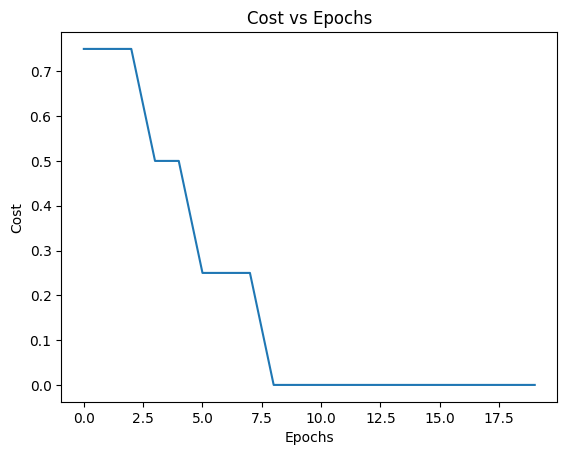

In [3]:
plt.plot(range(perceptron.epochs), perceptron.costs, label="Cost")
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')